<a href="https://colab.research.google.com/github/AndreCuenca17/Python_Quimica/blob/main/Practica_Cinetica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip install rdkit
! pip install pyscf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 10.3 MB/s eta 0:00:00


In [5]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

# Calculando Molecula cis

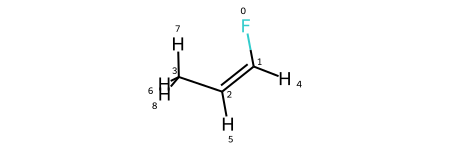

In [6]:
smiles = "F\C=C/C"
mol_cis = Chem.MolFromSmiles(smiles)
mol_cis = Chem.AddHs(mol_cis)
Chem.AllChem.EmbedMolecule(mol_cis,useRandomCoords=False, randomSeed = 36)
Chem.MolToXYZFile(mol_cis,"moleculacis.xyz")
mol_cis

In [7]:
cat moleculacis.xyz

9

F      1.068487    1.647800    0.075657
C      1.318920    0.315358   -0.019604
C      0.285099   -0.505982   -0.050222
C     -1.129875   -0.026457    0.015396
H      2.338028   -0.079534   -0.070190
H      0.475950   -1.568788   -0.125997
H     -1.602537   -0.255516   -0.952241
H     -1.155231    1.055927    0.268748
H     -1.598841   -0.582809    0.858453


In [9]:
from pyscf import gto, scf

In [10]:
molecula_cis1 = gto.M(atom="moleculacis.xyz")

In [13]:
molecula_cis1.basis = "3-21G"

mf = molecula_cis1.KS()
mf.xc = 'b3lyp'

In [14]:
mf.kernel()

converged SCF energy = -214.25247189141


-214.25247189141038

In [15]:
resultado=[mf.kernel()]

converged SCF energy = -214.252471891411


# Calculando Molecula trans

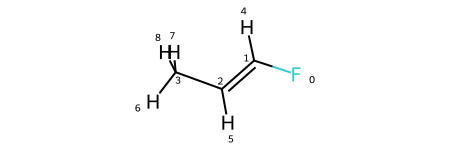

In [16]:
smiles = "F/C=C/C"
mol_trans = Chem.MolFromSmiles(smiles)
mol_trans = Chem.AddHs(mol_trans)
Chem.AllChem.EmbedMolecule(mol_trans,useRandomCoords=False, randomSeed = 36)
Chem.MolToXYZFile(mol_trans,"moleculatrans.xyz")
mol_trans

In [17]:
cat moleculatrans.xyz

9

F      2.535033   -0.060327    0.060788
C      1.253352    0.359749   -0.094309
C      0.273724   -0.503616    0.162284
C     -1.126257    0.006040   -0.023233
H      1.037712    1.373256   -0.418995
H      0.457081   -1.525041    0.488933
H     -1.812382   -0.886420   -0.101661
H     -1.181964    0.620107   -0.920127
H     -1.436299    0.616253    0.846320


In [20]:
molecula_trans1 = gto.M(atom = "moleculatrans.xyz")
molecula_trans1.basis = "3-21G"
mf1 = molecula_trans1.KS()
mf1.xc = 'b3lyp'

In [21]:
mf1.kernel()

converged SCF energy = -214.250579305846


-214.25057930584643

In [22]:
resultado_trans =[mf1.kernel()]

converged SCF energy = -214.250579305847


# Calculando Molecula Cis Rotada

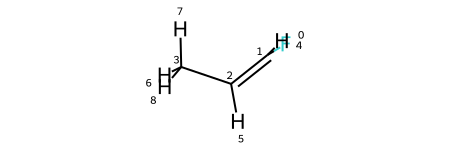

In [24]:
Chem.AllChem.SetDihedralDeg(mol_cis.GetConformer(0),3,2,1,0,90.0)
Chem.MolToXYZFile(mol_cis, "rotada.xyz")
mol_cis

In [25]:
cat rotada.xyz

9

F      1.844174    0.629758    1.193845
C      1.318920    0.315358   -0.019604
C      0.285099   -0.505982   -0.050222
C     -1.129875   -0.026457    0.015396
H      1.727899    0.721223   -0.949705
H      0.475950   -1.568788   -0.125997
H     -1.602537   -0.255516   -0.952241
H     -1.155231    1.055927    0.268748
H     -1.598841   -0.582809    0.858453


In [27]:
molecula_rotada = gto.M(atom = "rotada.xyz")
molecula_rotada.basis = "3-21G"
mf2 = molecula_rotada.KS()
mf2.xc = 'b3lyp'

In [28]:
mf2.kernel()

converged SCF energy = -214.08041116585


-214.0804111658496

In [29]:
resultado_CA = [mf2.kernel()]

converged SCF energy = -214.080411165849


# Grafico

In [30]:
pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

  Cloning https://github.com/giacomomarchioro/PyEnergyDiagrams to /tmp/pip-req-build-veqibsny
  Running command git clone --filter=blob:none --quiet https://github.com/giacomomarchioro/PyEnergyDiagrams /tmp/pip-req-build-veqibsny
  Resolved https://github.com/giacomomarchioro/PyEnergyDiagrams to commit 3d6086564aa99aa0a0f3db4a510b736015562d5c
  Preparing metadata (setup.py) ... done
  Created wheel for energydiagram: filename=energydiagram-0.2.0-py3-none-any.whl size=9465 sha256=99b3adec6402da07e34eac6d6648f3ab55f10beeb4bfa74d22db2130959bd3c3
  Stored in directory: /tmp/pip-ephem-wheel-cache-5rq3758f/wheels/fd/36/8c/10ed87cd41f9638b1e3a44dabe7e1e185131d967ea6ed395cf
Successfully built energydiagram


converged SCF energy = -214.252471891411
converged SCF energy = -214.08041116585
converged SCF energy = -214.250579305846


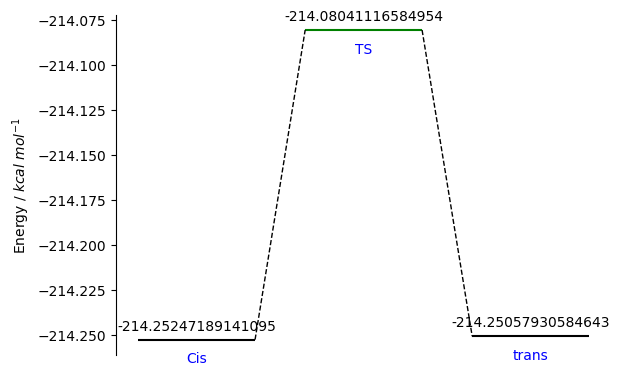

In [32]:
import matplotlib.pyplot as plt
from energydiagram import ED
diagram = ED()
diagram.add_level(mf.kernel(),'Cis')
diagram.add_level(mf2.kernel(),'TS',color='g')
diagram.add_level(mf1.kernel(),'trans')

diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.plot(ylabel="Energy / $kcal$ $mol^{-1}$") # this is the default ylabel


# ¿Reacción endotérmica o exotérmica?

In [33]:
energia_reactante = mf.kernel()

converged SCF energy = -214.25247189141


In [34]:
energia_producto = mf1.kernel()

converged SCF energy = -214.250579305846


In [35]:
energia_entalpia = energia_producto - energia_reactante
energia_entalpia

0.001892585564064575

Es una reacción Endotérmica debido a que la energía de entalpia es positiva

In [36]:
energia_comp_act = mf2.kernel()

converged SCF energy = -214.080411165849


In [37]:
energia_act = energia_comp_act - energia_reactante
energia_act

0.17206072556118102